# 随机梯度下降

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 读入训练数据
train = np.loadtxt('data3.csv', delimiter=',', skiprows=1)
train_x = train[:,0:2]
train_y = train[:,2]

In [4]:
# 参数初始化
theta = np.random.rand(4)

In [5]:
# 标准化
mu = train_x.mean(axis=0)
sigma = train_x.std(axis=0)
def standardize(x):
    return (x - mu) / sigma

In [6]:
train_z = standardize(train_x)

In [7]:
# 增加 x0 和 x3
def to_matrix(x):
    x0 = np.ones([x.shape[0], 1])
    x3 = x[:,0,np.newaxis] ** 2
    return np.hstack([x0, x, x3])

In [8]:
X = to_matrix(train_z)

In [9]:
# sigmoid 函数
def f(x):
    return 1 / (1 + np.exp(-np.dot(x, theta)))

# 分类函数
def classify(x):
    return (f(x) >= 0.5).astype(int)

In [10]:
# 学习率
ETA = 1e-3

In [11]:
# 重复次数
epoch = 5000

In [12]:
# 更新次数
count = 0

In [13]:
# 重复学习
for _ in range(epoch):
    # 使用随机梯度下降法更新参数
    p = np.random.permutation(X.shape[0])
    for x, y in zip(X[p,:], train_y[p]):
        theta = theta - ETA * (f(x) - y) * x

    # 日志输出
    # count += 1
    # print('第 {} 次 : theta = {}'.format(count, theta))

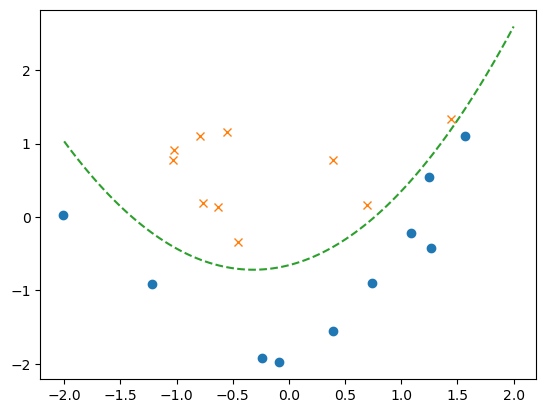

In [14]:
# 绘图确认
x1 = np.linspace(-2, 2, 100)
x2 = -(theta[0] + theta[1] * x1 + theta[3] * x1 ** 2) / theta[2]
plt.plot(train_z[train_y == 1, 0], train_z[train_y == 1, 1], 'o')
plt.plot(train_z[train_y == 0, 0], train_z[train_y == 0, 1], 'x')
plt.plot(x1, x2, linestyle='dashed')
plt.show()